In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# **실습 1 (기초 미적분 & 확률과 통계)**
직접 문제들을 풀어보며, 기초를 다져보도록 합시다.

> ## Q1. Marginalization

> ## L1. Independence of two random variables

> ## Q2. Independence

> ## L2. Functions of random variables

> ## Q3. Expectation and variance

> ## Q4. Various probability distributions

> ## L3. Law of total probability

> ## Q5. Bayes rule



---



# Q1. Marginalization

> marginal distribution이란, random variables가 2개 이상 존재하는 확률분포인 joint probability distribution **(e.g., p(X,Y))** 에서, 우리가 원하는 random variables **(e.g., X)** 으로 이루어진 확률 분포 **(e.g., p(X))** 만 남긴 확률 분포를 의미합니다.

## Q1-1. 다음 표에 주어진 값을 joint probability mass function으로 갖는, 두 discrete random variables X, Y가 있다.

|  X\Y     | Y = 2 | Y = 4 | Y=5 |
| ----------- | ----------- | ----------- | ----------- |
| X = 1      | 1/12       | 1/24 | 1/24 |
| X = 2   | 1/6        | 1/12 | 1/8 |
| X = 3   | 1/4        | 1/8 | 1/12 |


> ### Q1-1-1. $P(X\leq2, Y\leq4)$의 값은?
A1-1-1. P(X<=2, Y<=4) = P_XY(1,2) + P_XY(1, 4) + P_XY(2,2) +  P_XY(2,4)

In [2]:
ans = 1/12 + 1/24 + 1/6 + 1/12
ans # 3/8

0.37499999999999994

> ### Q1-1-2. Random variable X, Y 각각의 marginal pmf를 구하시오.

R_x = {1, 2, 3}
R_y = {2, 4, 5}

#### x의 확률 


Px(X) = {

    1/12 + 1/24+1/24 = 1/12 + 1/12 = 1/6    x = 1


    1/6 + 1/12 + 1/8 = 3/8                  x = 2


    1/4 + 1/8 + 1/12 = 11/24                x = 3


    0                                       otherwise

}

#### y의 확률

Py(Y) = {

    1/12 + 1/6 + 1/4 = 1/2                  y = 2


    1/24 + 1/12 + 1/8 = 1/4                 y = 4


    1/24 + 1/8 + 1/12 = 1/4                 y = 5

}


> ### Q1-1-3. $P(Y=2 | X=1)$의 값은?


$$P(Y = 2 | X = 1) = \frac{P(X=1, Y=2)}{P(X=1)} $$

$$ = \frac{P_XY(1, 2)}{P_X(1)}$$

$$ \frac{1/12}{1/6} = 1/2$$

## Q1-2. 다음 표에 주어진 값을 joint probability density function으로 갖는, 두 continuous random variables X, Y가 있다.


$$
f_{X,Y}(x,y) = \begin{cases} cx + 1 \quad (x,y \geq 0, x+y < 1) \\ 0 \qquad \; \; \text{(otherwise)} \end{cases}
$$

위의 식에서 알 수 있듯, 두 확률변수 X, Y가 값을 가질 수 있는 공간은 아래 그림과 같다.

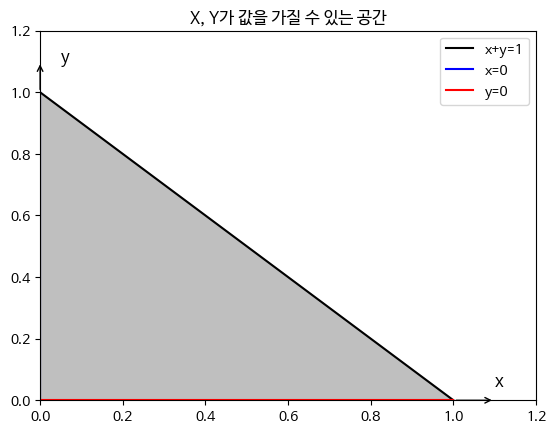

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic')

x = np.linspace(0, 1, 100)
y = 1 - x

fig, ax = plt.subplots()
ax.plot(x, y, 'k-', label='x+y=1')
ax.plot([0, 0], [0, 1], 'b-', label='x=0')
ax.plot([0, 1], [0, 0], 'r-', label='y=0')

# Fill the area
ax.fill_between(x, y, color='gray', alpha=0.5)

# Set labels
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# Set labels near the arrow
ax.annotate('x', xy=(1.1, 0.05), fontsize=12)
ax.annotate('y', xy=(0.05, 1.1), fontsize=12)

# Set title
ax.set_title('X, Y가 값을 가질 수 있는 공간')

# Set limits
ax.set_xlim([0, 1.2])
ax.set_ylim([0, 1.2])

# Add a legend
ax.legend()

# Add arrows
ax.annotate('', xy=(1.1, 0), xytext=(1, 0), arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(0, 1.1), xytext=(0, 1), arrowprops=dict(arrowstyle='->'))


plt.show()

> ### Q1-2-1. c의 값은?

c = 1

### Q1-2-2. Random variable X, Y 각각의 marginal pdf를 구하시오

### Q1-2-3. $P(Y < 2X^2)$는?

# L1. Independence of two random variables

> 만약 random variable X와 Y가 다음과 같은 성질을 만족한다면, 우리는 두 확률변수가 독립이라고 합니다.

$$
P(X=x \; | \; Y=y) = P(X=x) \\ \text{or} \\ P(X=x,Y=y) = P(X=x) * P(Y=y)
$$

> 예시를 들어봅시다. X는 '내일 비가 내린다'는 사건을 나타내는 r.v.이고 P(X='내일 비가 옴')=1/3입니다. Y는 '동전을 던져서 앞면이 나온다'는 r.v.이고, P(Y='앞면')=1/2입니다. 이때 $P(X=\text{'내일 비가 옴'}|\text{Y='앞면'})$ 은 무엇일까요?

> 직관적으로, $P(X=\text{'내일 비가 옴'}|Y=\text{'앞면'}) = P(X=\text{'내일 비가 옴'}) = 1/3$ 임을 알 수 있습니다. 왜냐하면, 제가 동전을 던져서 앞면이 나오든 뒷면이 나오든 내일의 날씨에 영향을 끼치지 않기 때문입니다. 이때, 이 두 r.v. X와 Y를 저희는 독립이라고 합니다.

# Q2. Independence

> ### Q2-1. Random variable X를, 평평한 동전 (i.e., 앞면이 나올 확률=0.5) 을 두번 던져서 앞면이 나오는 횟수라고 합시다 (X는 0,1,2의 값을 가질 수 있음). 동전을 두번 던진 이후, 같은 동전을 다시 두번 더 던져서 이때 앞면이 나오는 횟수를 Y라고 합시다 (Y는 0,1,2의 값을 가질 수 있음). 이때 $P((X<2) \; \text{and} \; (Y>1))$을 구하시오.

> A2-1. ?

> ### Q2-2. Q1-1의 X와 Y는 서로 독립인가?

> A2-2. ?

> ### Q2-3. Q1-2의 X와 Y는 서로 독립인가?

> A2-3. ?


# L2. Functions of Random Variables

> $X$가 discrete random variable이라면,  $Y = g(X)$ 도 random variable이 됩니다. 따라서, 당연히 Y도 평균, 분산등의 통계량들이 존재합니다. 먼저 Y가 어떤 값을 가질 수 있는지 (즉 random variable Y의 정의역) 알아봅시다.
$$
\text{Y가 가질 수 있는 값} = \text{Range of } Y = R_Y = \{g(x) \; | \; x \in \text{Range of } X\}
$$

> 예를 들어, 만약 $X$의 pmf가 다음과 같고
$$
P_X(x) =
\begin{cases}
1/5 \quad (\text{for } x=-1) \\
1/5 \quad (\text{for } x=-0) \\
1/5 \quad (\text{for } x=1) \\
1/5 \quad (\text{for } x=2) \\
1/5 \quad (\text{for } x=3) \\
\end{cases}
$$
$Y=2|X|$ 라고 할 경우, Y의 range는
$$
\{2|x| \; \text{where } x\in R_X\} = \{0, 2, 4, 6\}
$$
가 됩니다. 따라서 $Y$의 probability mass function은
$$
P_Y(y) =
\begin{cases}
P_Y(0) = P(2|X|=0) = P(X=0) = 1/5 \quad (\text{for } y=0) \\
P_Y(2) = P(2|X|=2) = P((X=1) \text{ or } (X=-1)) = 2/5 \quad (\text{for } y=2) \\
P_Y(4) P(2|X|=4) = P((X=2) \text{ or } (X=-2)) = 1/5  \quad (\text{for } y=4) \\
P_Y(6) P(2|X|=6) = P((X=3) \text{ or } (X=-3)) = 1/5 \quad (\text{for } y=6)
\end{cases}
$$
가 됨을 알 수 있습니다.

> $Y$의 expectation은 어떻게 구할 수 있을까요? 한 가지 방법은 방금 구한 $P_{Y}(y)$의 pmf를 활용하는 것입니다 ($\sum_{y\in R_Y} \; y \; P_Y(y)$).
$$
E(Y) = 0(1/5) + 2(2/5) + 4(1/5) + 6(1/5) = 14/5
$$

>하지만 $P_Y(y)$를 일일이 구한 다음 위와 같이 계산하는 것 보다는, 더욱 간단한 방법이 있는데, 바로 다음과 같은 등식을 활용하는 것입니다.
$$
E(Y) = E(g(X)) = \sum_{x_k \in R_X} \; g(x_k) \; P_X(x_k)
$$.

> 위 식으로 계산해본다면, $P_y(y)$를 따로 계산할 필요 없이, 바로 $X$의 pmf를 이용하여 다음과 같이 계산하면 됩니다.
$$
E(Y) = E(g(x)) = E(2|X|) =  2|-1|(1/5) + 2|0|(1/5) + 2|1|(1/5) + 2|2|(1/5) + 2|3|(1/5) \\
= 2/5 + 2/5 + 4/5 + 6/5  = 14/5
$$




# Q3. Expectation and Variance

> ## Q3-1. X를 다음과 같은 probability mass function을 같는 random variable이라고 하자.
$$P_X(k) =
\begin{cases}
\, 0.1 \; (\text{for} \; k=0) \\
0.4 \; (\text{for} \; k=1) \\
0.3 \; (\text{for} \; k=2) \\
0.2 \; (\text{for} \; k=3) \\
0.0 \; (\text{otherwise}) \\
\end{cases}
$$

> ### Q3-1-1. X의 expectation을 구하시오.

> ### A3-1-1. ?

> ### Q3-1-2. X의 variance를 구하시오.

> ### A3-1-2. ?

> ### Q3-1-3. $Y = (X-2)^2$일 때, E(Y)를 구하시오.

> ### A3-1-3. ?

> ### Q3-1-4. X의 cumulative distribution function (CDF)를 구하시오.

> ### A3-1-4. ?

> ## Q3-2. X를 다음과 같은 probability density function을 갖는 random variable이라고 하자.
$$
f_{X}(x) = \begin{cases} cx^2 \quad (|x| \leq 1) \\ 0 \quad \; \; \text{(otherwise)} \end{cases}
$$




> ### Q3-2-1. c를 구하시오.

> ### A3-2-1. ?


> ### Q3-1-2. E(x)와 Var(X)를 구하시오.

> ### A3-1-2. ?

> ### Q3-1-3. $P(X\geq 1/2)$를 구하시오.

> ### A3-1-3. ?

> ## Q3-3. $E(Y) = E(g(X)) = \sum_{x_k in R_x} \; g(x_k) \; P_X(x_k)$라는 사실을 이용하여, 다음 식을 보이시오.
$$
E(aX+b) = aE(X) + b \; \; \text{(linearity of expectation)}.
$$

> A3-3. ?


# Q4. Various distributions

> ## Q4-1. 시험에서 4지선다 문제를 총 10문제 풀어야 한다. 이때, 모든 문제를 전부 random으로 찍는다고 하자 (즉, 문제당 맞출 확률 1/4). $X$를 내가 정답으로 맞추는 문제의 개수라고 할 때, $X$의 probability mass function을 찾고, $P(X>8)$를 구하시오.

> ### A4-1.  ?

\\

> ## Q4-2. 직장에 출근했을 때, 평균적으로 1분에 0.2개의 이메일을 받는다고 생각해보자.

> ### Q4-2-1. 5분 동안 1개의 메일도 받지 않을 확률을 구하시오

> ### A4-2-1. ?

> ### Q4-2-2. 10분 동안 4개 이상의 메일을 받을 확률을 구하시오 (Hint: Use poisson distribution)

> ### A4-2-2. ?

# L3. Law of total probability

> 두 가지의 동전이 있다고 합시다. 첫 번째 동전은 앞면이 나올 확률이 1/2이고, 두번째 동전은 앞면이 나올 확률이 1/3입니다. 이때 첫 번쨰 동전을 고르는 사건을 A라고 합시다. 또한, 동전의 앞면이 나오는 사건을 B라고 합시다.

> 이 때, 동전의 앞면이 나올 확률 P(B)는
$$
P(B) = P(B \cap U) = P(B \cap (A \cup A^c)) = P(B \cap A) + P(B \cap A^c)
$$
임을 알 수 있습니다.

> 위 식에 $P(A \cap B) = P(A|B)P(B)$를 대입해보면,
$$
P(B) = P(B|A)P(A) + P(B|A^c)P(A^c)
$$
임을 알 수 있습니다. 즉, 만약 우리가 $P(B)$를 구하고 싶을 때, 오른쪽 항들의 값을 전부 알고 있다면, 쉽게 계산 가능하다는 것을 의미합니다.

# Q5. Bayes Rule

> ## P(H)를 내가 두통이 걸릴 확률, P(F)를 내가 감기가 걸릴 확률이라고 하자. 다음과 같은 6건의 '나의 과거 의료기록 데이터'가 주어졌다고 할 때, Bayes Rule을 이용하여 $P(F|H)$를 계산하시오.

|  H (두통)     | F (감기) |
| ----------- | ----------- |
| F   | F       |
| T   | F        |
| F   | F        |
| T   | T        |
| T   | T        |
| F   | T        |

> ### A5. ?






---



# Reference

1. https://www.cs.bu.edu/fac/snyder/cs237/
2. https://www.probabilitycourse.com/